# **1. Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/praktikum_BDPA/online_gaming_behavior_dataset.csv')
df.head(10)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
7,9007,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium
8,9008,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High


# **2. Analisis dan visualisasi data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [ ]:
df.isnull().sum()

,0
PlayerID,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0


In [ ]:
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

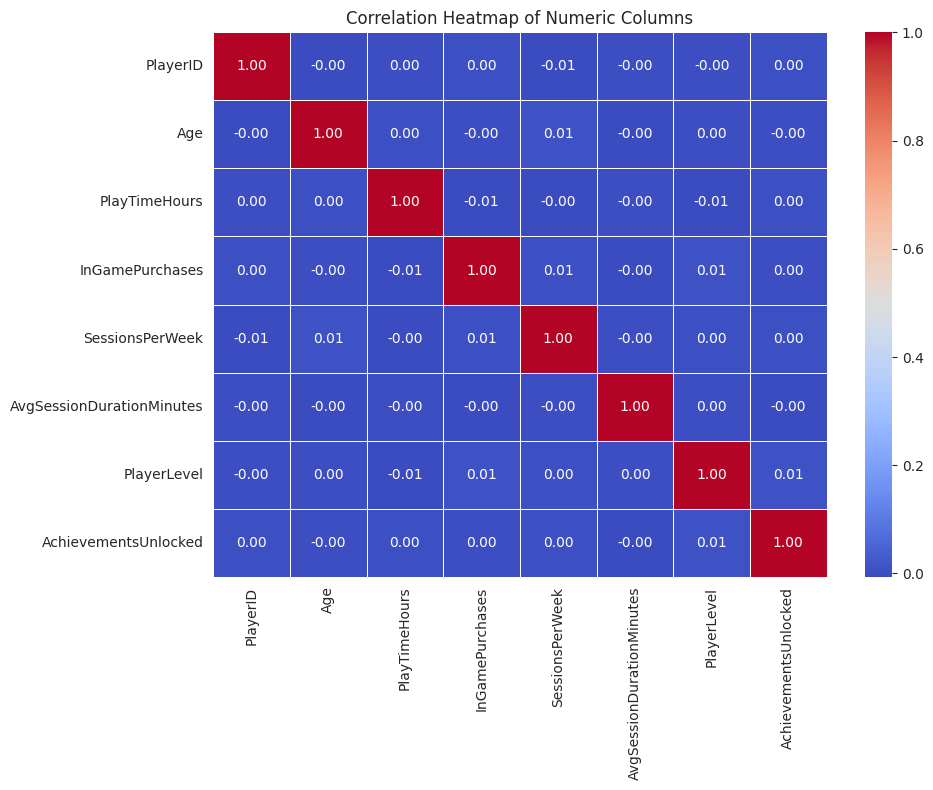

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
numeric_df = df.select_dtypes (include=['number'])
correlation_matrix = numeric_df.corr()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

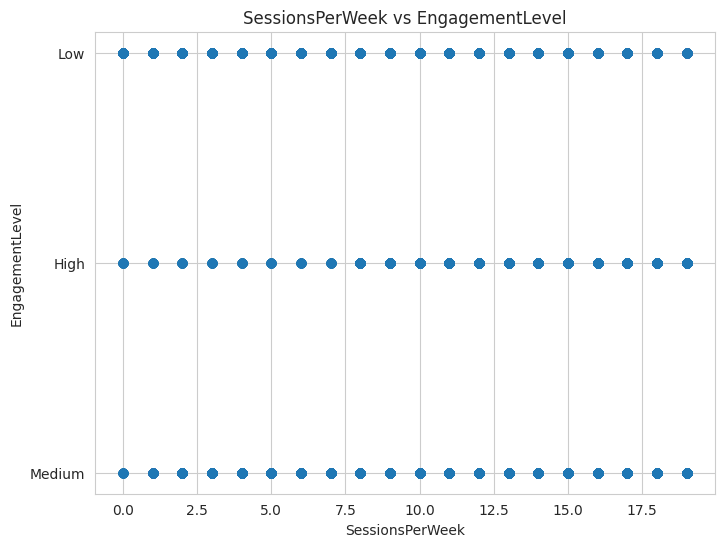

In [ ]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
plt.scatter(df['SessionsPerWeek'], df ['EngagementLevel'])
# Add labels and title
plt.xlabel('SessionsPerWeek')
plt.ylabel('EngagementLevel')
plt.title('SessionsPerWeek vs EngagementLevel')
# Show the plot
plt.grid(True) # Add a grid for better readability
plt.show()

# **3. Data Preparation / Preprocessing**

### **Menghapus Kolom**

In [ ]:
df.drop(['PlayerID', 'Age', 'Gender', 'Location', 'InGamePurchases', 'AchievementsUnlocked'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GameGenre                  40034 non-null  object 
 1   PlayTimeHours              40034 non-null  float64
 2   GameDifficulty             40034 non-null  object 
 3   SessionsPerWeek            40034 non-null  int64  
 4   AvgSessionDurationMinutes  40034 non-null  int64  
 5   PlayerLevel                40034 non-null  int64  
 6   EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


### **- Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ['GameGenre']
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
df.head()

# # membersihkan kolom teks terlebih dahulu
df['GameDifficulty'] = df['GameDifficulty'].str.lower().str.strip()
df['EngagementLevel'] = df['EngagementLevel'].str.lower().str.strip()

# # mengubah data pada kolom dengan mapping
difficulty_mapping = {'easy': 0, 'medium': 1, 'hard': 2}
engagement_mapping = {'low': 0, 'medium': 1, 'high': 2}

# # menerapkan pemetaan pada data
df['GameDifficulty'] = df['GameDifficulty'].map(difficulty_mapping)
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_mapping)

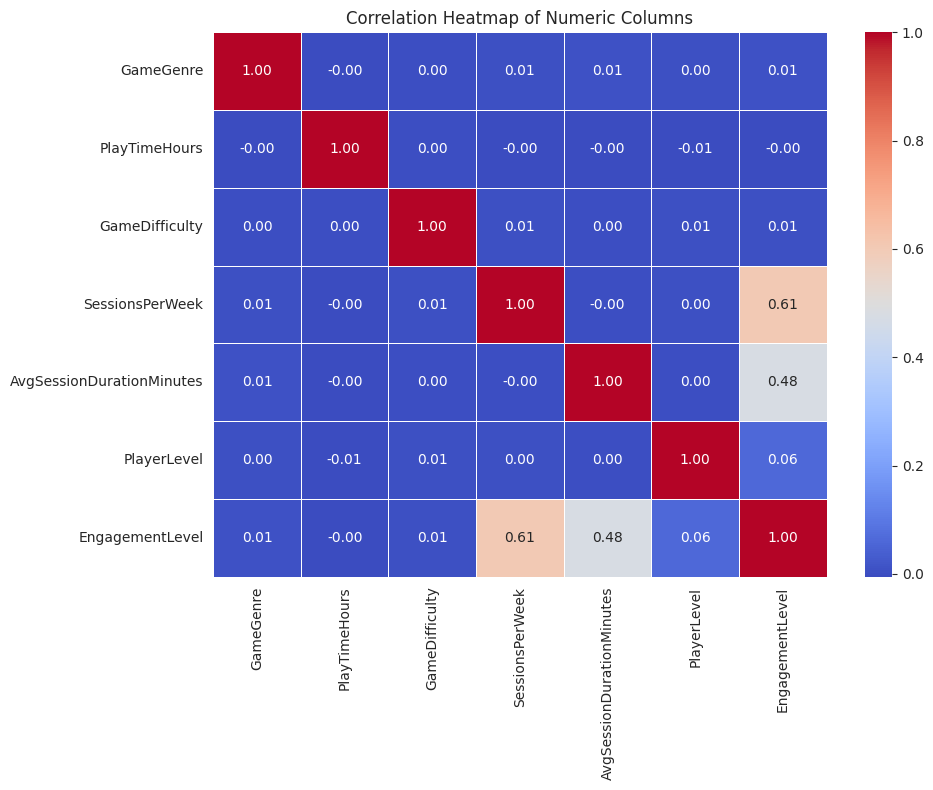

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
numeric_df = df.select_dtypes (include=['number'])
correlation_matrix = numeric_df.corr()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

### **Normalisasi**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_features = df.drop(columns={"EngagementLevel"}) #features
df_target = df["EngagementLevel"] #target

In [ ]:
# Tampilkan beberapa baris pertama dari fitur dan target untuk memastikan pemisahan
print("\nBeberapa baris pertama dari fitur (X):")
print(x.head())
print("\nBeberapa baris pertama dari target (y):")
print(y.head())


Beberapa baris pertama dari fitur (X):
   GameGenre  InGamePurchases  GameDifficulty  SessionsPerWeek  \
0        4.0                0               1                6   
1        4.0                0               1                5   
2        3.0                0               0               16   
3        0.0                1               0                9   
4        0.0                0               1                2   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  
0                        108           79                    25  
1                        144           11                    10  
2                        142           35                    41  
3                         85           57                    47  
4                        131           95                    37  

Beberapa baris pertama dari target (y):
0    1
1    1
2    2
3    1
4    1
Name: EngagementLevel, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
cols = list(x.columns)
df_features_scaled = pd.DataFrame(data = x)
df_features_scaled[cols] = StandardScaler().fit_transform(x[cols])
df_features_scaled.head()

,GameGenre,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,1.412273,-0.501334,0.383999,-0.602363,0.269487,1.026459,0.032814
1,1.412273,-0.501334,0.383999,-0.775865,1.004019,-1.352160,-1.006648
2,0.705766,-0.501334,-0.896340,1.132666,0.963212,-0.512647,1.141573
3,-1.413756,1.994676,-0.896340,-0.081854,-0.199798,0.256906,1.557358
4,-1.413756,-0.501334,0.383999,-1.296374,0.738771,1.586134,0.864383


### **- Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
# Membagi data dengan train test split
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_target, test_size=0.2, random_state=45)

# Menampilkan data X_train dan X_test
print('Train set:', X_train.shape, y_train.shape)
print(X_train.head())
print('\n')
print('Test set:', X_test.shape, y_test.shape)
print(X_test.head())

Train set: (32027, 7) (32027,)
       GameGenre  InGamePurchases  GameDifficulty  SessionsPerWeek  \
11408   1.412273        -0.501334        1.664339        -0.949368   
6944   -0.000741         1.994676       -0.896340         0.785660   
15158   0.705766        -0.501334        0.383999         0.265152   
2334   -1.413756        -0.501334        0.383999         0.438654   
26043   0.705766        -0.501334       -0.896340         1.479671   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  
11408                  -1.322000    -0.127871              1.141573  
6944                    1.432497     0.991479             -0.452268  
15158                  -1.383212    -0.197830              0.171409  
2334                    1.208056     0.921520              1.557358  
26043                  -0.526257    -1.107302             -0.729458  


Test set: (8007, 7) (8007,)
       GameGenre  InGamePurchases  GameDifficulty  SessionsPerWeek  \
33152  -1.413756        -0.5

# **4. Modeling**

### **- Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_model.coef_

array([ 6.24008082e-04,  5.55584745e-03, -2.03529680e-04,  4.34633390e-01,
        3.42716265e-01,  3.93567264e-02,  4.32613904e-02])

In [ ]:
lr_model.intercept_

np.float64(0.9997915464230268)

### **- Prediksi**

In [ ]:
# Menguji model
# Menguji model dengan X_test
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = lr_model.predict(X_test)
# Round the continuous predictions to the nearest integer to get discrete classes
y_pred_classes = np.round(y_pred).astype(int)
print('Data asli: \n', y_test[0:10])
print('\n')
print('Hasil prediksi (setelah pembulatan): \n', y_pred_classes[0:10])
# Evaluasi
acc = accuracy_score(y_test, y_pred_classes)
prec = precision_score(y_test, y_pred_classes, average='macro')
rec = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
cm = confusion_matrix(y_test, y_pred_classes)
# Tampilkan hasil
print("Akurasi :", acc)
print("Presisi :", prec)
print("Recall :", rec)
print("F1 Score :", f1)
print("Confusion Matrix:\n", cm)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_classes))

Data asli: 
 33152    1
20373    2
11565    1
17858    1
11085    0
20671    1
34000    1
17368    1
35195    1
22371    1
Name: EngagementLevel, dtype: int64


Hasil prediksi (setelah pembulatan): 
 [0 2 1 1 0 1 1 1 1 1]
Akurasi : 0.7945547645809916
Presisi : 0.8294366708470399
Recall : 0.7585546378107536
F1 Score : 0.782971802635957
Confusion Matrix:
 [[1364  686   46]
 [ 249 3569   75]
 [  45  544 1429]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.82      0.65      0.73      2096
           1       0.74      0.92      0.82      3893
           2       0.92      0.71      0.80      2018

    accuracy                           0.79      8007
   macro avg       0.83      0.76      0.78      8007
weighted avg       0.81      0.79      0.79      8007



### **- Evaluasi**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Hitung Metrik Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Hitung MAPE (Mean Absolute Percentage Error)
# Hindari pembagian dengan nol jika ada nilai 0 di y_test
y_test_non_zero = y_test[y_test != 0]
y_pred_non_zero = y_pred[y_test != 0]
if len(y_test_non_zero) > 0 :
  mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100
else:
  mape = float('inf') # Set to infinity if all actual values are 0
# Tampilkan hasil metrik regresi
print("\nMetrik Evaluasi Regresi:")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"R2 : {r2:.2f}")


Metrik Evaluasi Regresi:
MSE : 0.20
RMSE : 0.45
MAE : 0.34
MAPE : 23.21%
R2 : 0.60
